# Machine Learning Examples with Scikit-Learn

This Jupyter Notebook provides basic examples of supervised and unsupervised machine learning algorithms using scikit-learn.

## Supervised Learning:

### K-Nearest Neighbors (KNN)
- Example: KNN_Classification.ipynb

In this example, we demonstrate how to use the K-Nearest Neighbors (KNN) algorithm for classification.

### Decision Tree
- Example: DecisionTree_Classification.ipynb

This example showcases the Decision Tree algorithm for classification.

### Support Vector Machine (SVM)
- Example: SVM_Classification.ipynb

Here, we use the Support Vector Machine (SVM) algorithm for classification.

## Unsupervised Learning:

### K-Means Clustering
- Example: KMeans_Clustering.ipynb

In this example, we demonstrate the K-Means clustering algorithm for unsupervised learning.

## How to Use the Notebooks:

1. Open the respective Jupyter Notebook file for the algorithm you want to explore.
2. Follow the code and comments to understand the algorithm and its usage.
3. Run the code cells to execute the examples.

## Requirements:

- Python
- Jupyter Notebook
- scikit-learn
- pandas
- numpy
- matplotlib
- mlxtend
- pydotplus (for decision tree visualization)

You can install the required packages using pip:

```shell
pip install scikit-learn pandas numpy matplotlib mlxtend pydotplus

**Example of Supervised algorithm: KNN**

In [89]:
# Importing Libraries
import pylab as pl
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [90]:
# Creating a routine to use the Iris dataset
iris = datasets.load_iris()

In [91]:
# Converting the Iris dataset into a DataFrame
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])


df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [92]:
# Transforming the data into arrays
X = df_iris.iloc[:, :-1].values  # Input data
y = df_iris.iloc[:, 4].values  # Outputs or target

In [93]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split  # Function for dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  # Split 20% for testing

In [94]:
# Performing data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Object for data normalization
scaler.fit(X_train)  # Perform data normalization

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for classification
classifier.fit(X_train, y_train)  # Apply classification

KNeighborsClassifier()

In [96]:
# Making predictions
y_pred = classifier.predict(X_test)

In [97]:
# Building the confusion matrix to compare the created model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



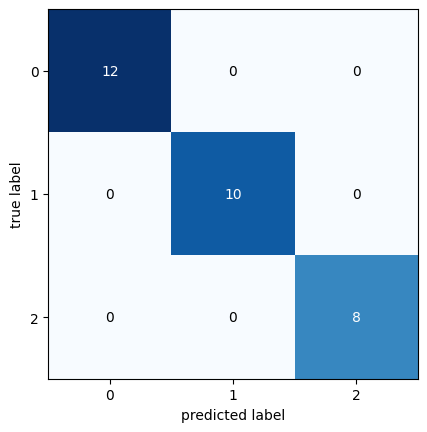

In [98]:
# Plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix_plot = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_plot)
plt.show()

**Example of Supervised Algorithm: Decision Tree**

In [99]:
from sklearn.tree import DecisionTreeClassifier  # Importing the Decision Tree classifier
from sklearn import metrics  # Importing metrics for evaluation

# Creating the classification object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train, y_train)

In [100]:
# Making classification predictions
y_pred = clf.predict(X_test)

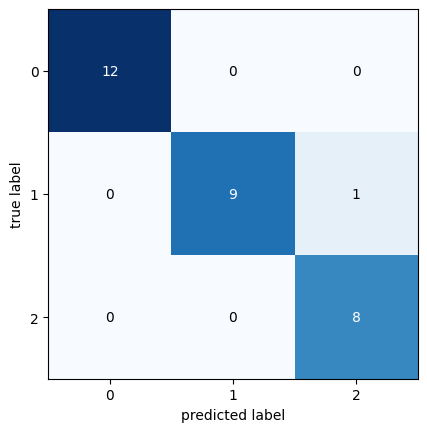

In [101]:
# Evaluating the model

# Plotting the confusion matrix
confusion_matrix_plot = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_plot)
plt.show()

In [102]:
# Decision Tree visualization
# Importing the necessary libraries for Decision Tree visualization
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
!pip install pydotplus
import pydotplus

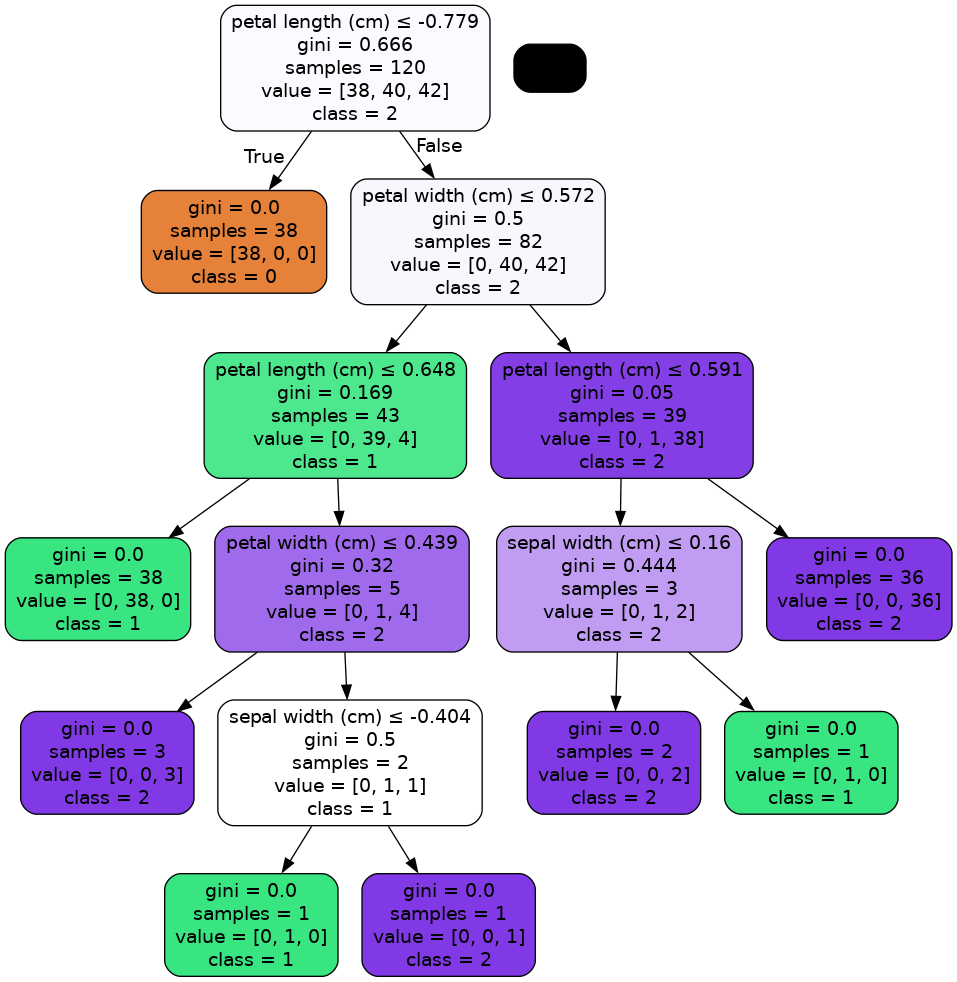

In [103]:
# Building the Decision Tree for the Iris dataset
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=iris.feature_names, class_names=['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

**Example of Supervised Algorithm: Support Vector Machine (SVM)**

In [104]:
# Library required for SVM construction
from sklearn.svm import SVC

# Creating the SVM object
clf = SVC(gamma='auto')  # Choosing the linear kernel

# Performing classification via SVM
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [105]:
# Making classification predictions
y_pred = clf.predict(X_test)

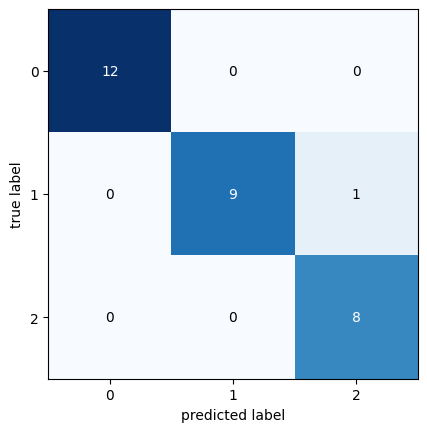

In [106]:
# Evaluating the model
from mlxtend.plotting import plot_confusion_matrix

# Plotting the confusion matrix
confusion_matrix_plot = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_plot)
plt.show()


**Example of Unsupervised Algorithm: k-Means**

In [107]:
# Importing the required libraries
from pandas import DataFrame
import matplotlib.pyplot as plt

# Creating random data
data = {'x': [25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38, 43, 51, 46],
        'y': [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 20, 5, 29, 27, 8, 7]
       }

# Creating the DataFrame
df = DataFrame(data, columns=['x', 'y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


<Axes: >

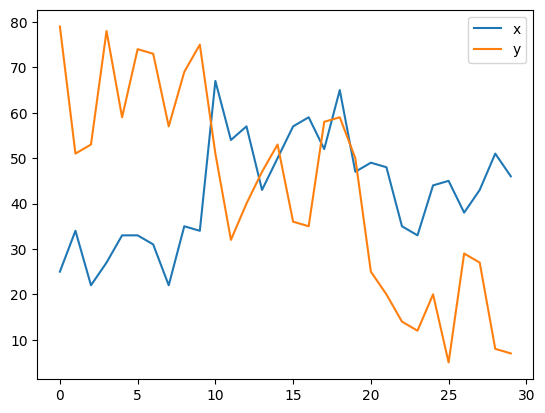

In [108]:
df.plot()

In [109]:
# Adding libraries to build the algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)  # Creating the k-means algorithm object to find 2 clusters
kmeans.fit(df)  # Applying the algorithm
centroids = kmeans.cluster_centers_  # Finding the centroid coordinates
print(centroids)

[[38.75       61.625     ]
 [47.07142857 22.14285714]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Y')

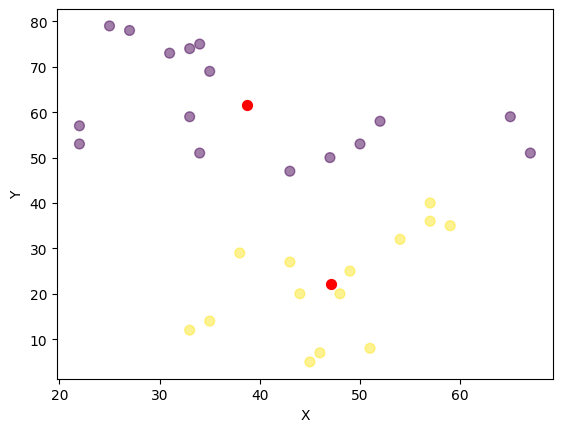

In [110]:
# Plotting the output graph
plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("X")
plt.ylabel("Y")